In [1]:
import json
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import seaborn as sns

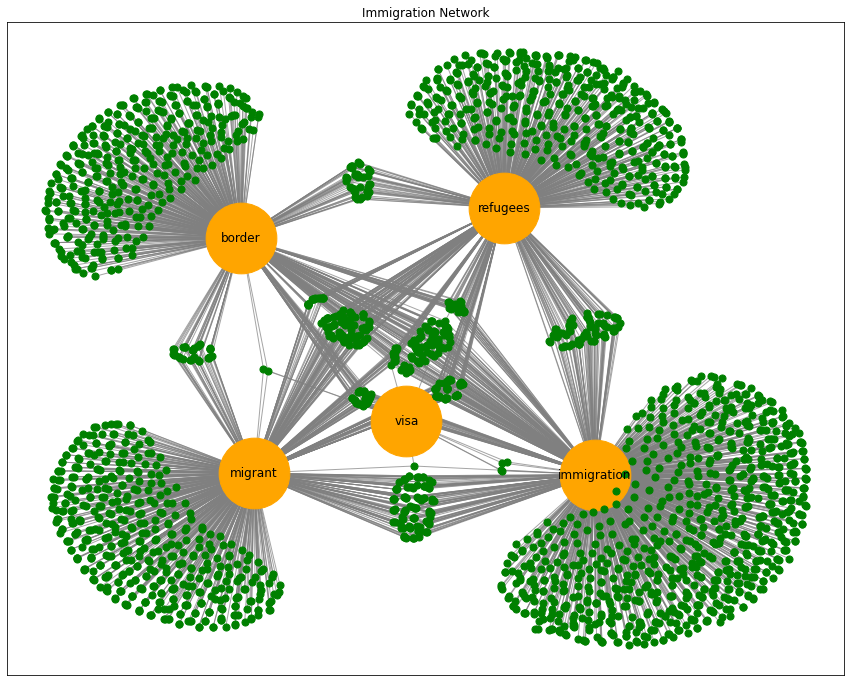

In [ ]:
# Load the JSON data into a Pandas DataFrame
with open('Election Tweets.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

df = pd.json_normalize(data)
# Drop duplicates based on 'id' column
df.drop_duplicates(subset='id', keep='first', inplace=True)

# Fill NaN values in 'full_text' column with an empty string
df['full_text'] = df['full_text'].fillna('')

# Check for duplicates in 'full_text' column
duplicate_tweets = df[df.duplicated('full_text', keep=False)]

# Initialize network graph
G_immigration_network = nx.Graph()

# Define immigration-related keywords
immigration_keywords = ["immigration", "migrant", "border", "visa", "refugees"]

user_color = 'green'
keyword_color = 'orange'
user_size = 10
keyword_size = 1000

# Iterate through each tweet
for tweet in data:
    # Check if 'user' key is present in the tweet
    if 'user' in tweet:
        # Extract relevant information
        user = tweet['user']['screen_name']
        tweet_text = tweet['full_text'].lower()

        # Check if the tweet contains any immigration-related keywords
        if any(keyword in tweet_text for keyword in immigration_keywords):
            # Add user node
            G_immigration_network.add_node(user, color=user_color)

            # Add edges between the user and immigration-related keywords
            for keyword in immigration_keywords:
                if keyword in tweet_text:
                    G_immigration_network.add_edge(user, keyword)

# Visualize the Immigration Network
plt.figure(figsize=(15, 12))
pos = nx.spring_layout(G_immigration_network)
node_colors = [node[1].get('color', user_color) for node in G_immigration_network.nodes(data=True)]
node_colors = [node[1].get('color', keyword_color) for node in G_immigration_network.nodes(data=True)]
node_size = [node[1].get('size', user_size) for node in G_immigration_network.nodes(data=True)]
node_size = [node[1].get('size', keyword_size) for node in G_immigration_network.nodes(data=True)]

# Draw nodes with labels only for the top 10 nodes
nx.draw_networkx_nodes(G_immigration_network, pos, nodelist=immigration_keywords, node_color='orange', node_size=5000)
nx.draw_networkx_labels(G_immigration_network, pos, labels={node: node for node in immigration_keywords})

# Draw the rest of the nodes without labels
nx.draw_networkx_nodes(G_immigration_network, pos, nodelist=set(G_immigration_network.nodes) - set(immigration_keywords),
                       node_color='green', node_size=50)
nx.draw_networkx_edges(G_immigration_network, pos, edge_color='gray', alpha=0.7)

plt.title('Immigration Network')
plt.show()

In [ ]:
# Initialize network graph
G = nx.DiGraph()
# Extract retweets
retweets = [(tweet['user']['screen_name'], tweet['retweeted_status']['user']['screen_name']) for tweet in data if 'retweeted_status' in tweet]

# Add edges to the graph
G.add_edges_from(retweets)

# Calculate degree centrality
degree_centrality = nx.degree_centrality(G)

# The top N most influential users
top_users = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:10]


print("Top 10 Most Influential Users:")
for user in top_users:
    print(f"{user}: Degree Centrality - {degree_centrality[user]}")

Top 10 Most Influential Users:
maritstiles: Degree Centrality - 0.15265200517464425
sunlorrie: Degree Centrality - 0.14294954721862874
MigrantRightsCA: Degree Centrality - 0.04851228978007762
macleans: Degree Centrality - 0.04527813712807245
cdnpoli_memes: Degree Centrality - 0.0407503234152652
Canada64617821: Degree Centrality - 0.03428201811125486
QuigginReport: Degree Centrality - 0.026520051746442435
TheTorontoSun: Degree Centrality - 0.025226390685640365
ctvqp: Degree Centrality - 0.025226390685640365
TrueNorthCentre: Degree Centrality - 0.02457956015523933


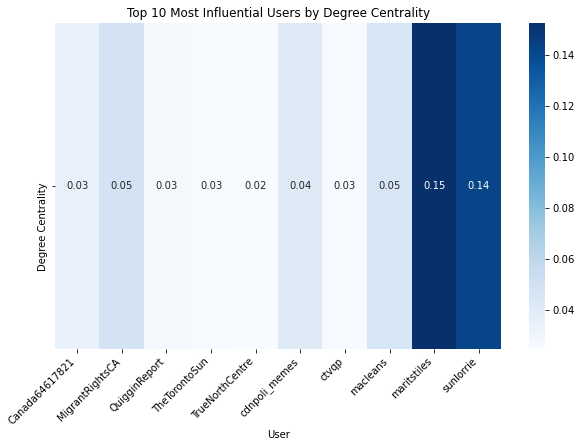

In [ ]:
# Convert to a pandas DataFrame
df_degree_centrality = pd.DataFrame({'User': top_users, 'Degree Centrality': [degree_centrality[user] for user in top_users]})

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_degree_centrality.pivot_table(index='User', values='Degree Centrality').T, cmap='Blues', annot=True, fmt=".2f")
plt.title('Top 10 Most Influential Users by Degree Centrality')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# Calculate degree centrality
betweenness_centrality = nx.betweenness_centrality(G)

# The top N most influential users
top_users_bc = sorted(betweenness_centrality, key=betweenness_centrality.get, reverse=True)[:10]

print("Top 10 Most Influential Users:")
for user in top_users_bc:
    print(f"{user}:  Betweenness Centrality - {betweenness_centrality[user]}")

Top 10 Most Influential Users:
sunlorrie:  Betweenness Centrality - 0.00010131585006928832
MigrantRightsCA:  Betweenness Centrality - 2.972489816082426e-05
schtev69:  Betweenness Centrality - 1.8839724186437912e-05
immigrantsnews:  Betweenness Centrality - 1.5909100424103125e-05
BillTufts:  Betweenness Centrality - 1.0047852899433552e-05
BugJudy:  Betweenness Centrality - 1.0047852899433552e-05
Can_Libertarian:  Betweenness Centrality - 6.698568599622368e-06
L_Geekhome:  Betweenness Centrality - 5.861247524669573e-06
BobMakenzie1:  Betweenness Centrality - 5.023926449716776e-06
albertarabbit:  Betweenness Centrality - 2.511963224858388e-06


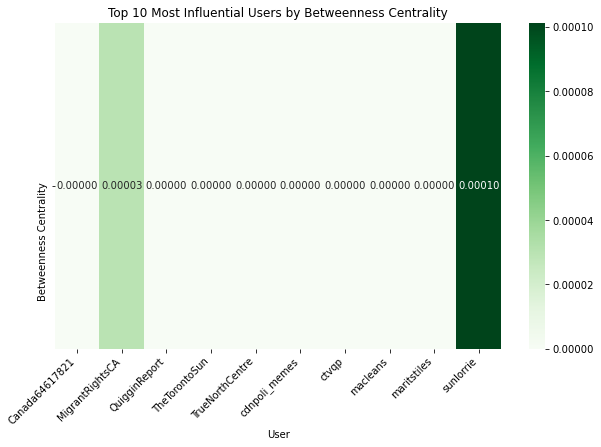

In [ ]:
# Convert to a pandas DataFrame
df_betweenness_centrality = pd.DataFrame({'User': top_users, 'Betweenness Centrality': [betweenness_centrality[user] for user in top_users]})

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_betweenness_centrality.pivot_table(index='User', values='Betweenness Centrality').T, cmap='Greens', annot=True, fmt=".5f")
plt.title('Top 10 Most Influential Users by Betweenness Centrality')
plt.xticks(rotation=45, ha='right')
plt.show()